# Project: WeRateDogs Tweets Data Wrangling and Analysis

# Contents
 - [Introduction](#Introduction) 
 - [Data gathering](#Data-Gathering)
 - [Assessing Data](#Assessing-Data)
 - [Quality Issues](#Quality-Issues)
 - [Tidiness Issues](#Tidiness-Issues)
 - [Cleaning Data](#Cleaning-Data)
 - [Analyzing and Visualizing Data](#Analyzing-and-Visualizing-Data)
 - [Insights Summary](#Insights-Summary)

## Introduction

This project aims to wrangle, analyze, visualize and gain insight into WeRateDogs tweet data. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

The dataset for this analysis consists of the enhanced WeRateDogs Twitter archive as it stood on August 1, 2017.  Additional data for WeRateDogs tweet via the tweeter API, and an image prediction file of the dog images twitted by WeRateDogs.

## Data Gathering
In the cell below, **all** three pieces of data for this project is gathered and load in the notebook.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Plot visualizations inline
% matplotlib inline

In [2]:
# Read twitter_archive_enhanced.csv into data frame.
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# Fetch image predictions data.
r = requests.get(url)
# Raise error if http response status code is not 200
r.raise_for_status()
# Read the image prediction tsv file into a data frame.
with open('image_predictions.tsv', 'w') as f:
    f.write(r.text)
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 798576900688019456
Fail
607: 7983

Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 759793422261743616
Fail
891: 7595

Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167: 722613351520608256
Fail
1168:

Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442:

Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716:

Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990:

Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264:

In [4]:
# Read tweet json line by line into pandas dataframe.
df_twitter_api_data = pd.read_json('tweet-json.json', lines=True)

## Assessing Data

In [5]:
# Exploratory data analysis of df_twitter_archive, print information summary of the dataframe.
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
# Check null values in the archived twitter data dataframe.
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [7]:
df_twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [8]:
# Print 100 samples.
df_twitter_archive.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1607,685663452032069632,NaN,NaN,2016-01-09 03:24:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brooks. He's confused by the almighty bal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685663452...,12,10,Brooks,None,None,None,None
1426,697881462549430272,NaN,NaN,2016-02-11 20:34:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carter. He wakes up in the morning and...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697881462...,10,10,Carter,None,None,None,None
1388,700462010979500032,NaN,NaN,2016-02-18 23:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Murphy. He's a mini golden retriever. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700462010...,6,10,Murphy,None,None,None,None
572,801285448605831168,NaN,NaN,2016-11-23 04:45:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",oh h*ck 10/10 https://t.co/bC69RrW559,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801285448...,10,10,None,None,None,None,None
1462,694905863685980160,NaN,NaN,2016-02-03 15:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's a Bisquick Taj Mapaw. Too...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694905863...,10,10,Archie,None,None,None,None
1858,675501075957489664,NaN,NaN,2015-12-12 02:23:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I shall call him squishy and he shall be mine,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675501075...,13,10,None,None,None,None,None
1780,677700003327029250,NaN,NaN,2015-12-18 04:00:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralph. He's an interpretive dancer. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677700003...,10,10,Ralph,None,None,None,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
438,820013781606658049,NaN,NaN,2017-01-13 21:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oliver. He has dreams o...,8.199522e+17,4.196984e+09,2017-01-13 17:00:21 +0000,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,None,None,None,puppo
2225,668286279830867968,NaN,NaN,2015-11-22 04:33:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rusty. Rusty's dreaming of a world where ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668286279...,11,10,Rusty,None,None,None,None


In [9]:
# Check rating_denominator values and number of occurance of each value.
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
# Number of rows where rating_denominator is not 10.
len(df_twitter_archive[df_twitter_archive.rating_denominator != 10])

23

In [11]:
# Check rating_numerator values and number of occurance of each value.
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
# Image predictions data exploratory analysis, print summary of the dataframe.
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
# Check null values in the image prediction data dataframe.
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [14]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [16]:
df_image_predictions.sample(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1120,726828223124897792,https://pbs.twimg.com/media/ChY2aHyWMAAbNQE.jpg,1,miniature_pinscher,0.255327,True,Border_terrier,0.181279,True,Labrador_retriever,0.125185,True
1971,869227993411051520,https://pbs.twimg.com/media/DBAePiVXcAAqHSR.jpg,1,Pembroke,0.664181,True,Chihuahua,0.169234,True,Cardigan,0.132700,True
296,671362598324076544,https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg,1,tub,0.393616,False,bathtub,0.383522,False,swimming_trunks,0.077301,False
933,703356393781329922,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
559,677700003327029250,https://pbs.twimg.com/media/CWesj06W4AAIKl8.jpg,1,Siberian_husky,0.120849,True,junco,0.079206,False,malamute,0.063088,True
42,666739327293083650,https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg,1,miniature_poodle,0.546933,True,cocker_spaniel,0.165255,True,toy_poodle,0.095959,True
194,669573570759163904,https://pbs.twimg.com/media/CUrNmtFWoAAnWCD.jpg,1,West_Highland_white_terrier,0.946828,True,miniature_schnauzer,0.022344,True,cairn,0.009462,True
446,674664755118911488,https://pbs.twimg.com/media/CVzkA7-WsAAcXz6.jpg,1,African_crocodile,0.330625,False,American_alligator,0.075356,False,mink,0.057481,False
653,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
1880,846874817362120707,https://pbs.twimg.com/media/C8C0JYHW0AAy-7u.jpg,2,Shetland_sheepdog,0.450539,True,papillon,0.187928,True,collie,0.140068,True


In [17]:
df_image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
beagle                        18
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
Maltese_dog                   18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [18]:
df_twitter_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [19]:
df_twitter_api_data[df_twitter_api_data.in_reply_to_user_id > 0]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
29,NaN,NaN,2017-07-15 16:51:35,"[27, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,117,False,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,...,NaN,NaN,NaN,NaN,4,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
54,NaN,NaN,2017-07-02 21:58:53,"[13, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,129,False,@roushfenway These are good dogs but 17/10 is ...,NaN,...,NaN,NaN,NaN,NaN,7,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
63,NaN,NaN,2017-06-27 12:14:36,"[16, 31]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,315,True,@RealKentMurphy 14/10 confirmed,NaN,...,NaN,NaN,NaN,NaN,10,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
112,NaN,NaN,2017-06-02 19:38:25,"[30, 60]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,121,False,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,...,NaN,NaN,NaN,NaN,3,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
147,NaN,NaN,2017-05-13 16:15:35,"[17, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2363,False,@Jack_Septic_Eye I'd need a few more pics to p...,NaN,...,NaN,NaN,NaN,NaN,105,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
148,NaN,NaN,2017-05-12 17:12:53,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 863079538779013120, 'id_str'...",9094,False,Ladies and gentlemen... I found Pipsy. He may ...,NaN,...,0.0,NaN,NaN,NaN,1195,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
178,NaN,NaN,2017-04-26 12:48:51,"[10, 28]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,242,False,@Marc_IRL pixelated af 12/10,NaN,...,NaN,NaN,NaN,NaN,20,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
183,NaN,NaN,2017-04-24 15:13:52,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 856526604033556482, 'id_str'...",12446,False,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,...,0.0,NaN,NaN,NaN,2068,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
185,NaN,NaN,2017-04-23 23:26:03,"[28, 165]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,545,False,@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,...,NaN,NaN,NaN,NaN,17,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
187,NaN,NaN,2017-04-22 19:15:32,"[14, 86]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,320,False,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,...,NaN,NaN,NaN,NaN,27,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [20]:
df_twitter_api_data.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

## Quality Issues

### Tweet Archive Data

1. There are rows of retweet_status_id and reply_status_id that contain non NAN values, those are obvious duplications, since they are either a retweet or reply to an original dog rating tweet.


2. The project specifications specified that rating denominators are always 10, some rating_denominators values are not 10.


3. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp contains multiple `NAN` values, this columns are not needed for this analysis (there values are redundant) and should be dropped at the next section.


4. The timestamp column is an object type, which is an incorrect type for the values that it stores, it should be converted to datetime type at the next section.


5. The dogs name are not consistently capitalized. All the non capitalized dog names are either a single letter `a`, `an`, `none` or doesn't make sense for a dog's name.


6. Values for the source column contains redundant data not needed for this analysis. e.g, it contains html anchor element, and a URL pointing to the resource or where to download resource.


7. There are observations that are not actual dog rating tweets. E.g `Today, 10/10, should be National Dog Rates Day`

### Tweet API Data

1. The contributors, coordinates, and geo columns only contain null values.


2. There are 78 observations where the column in_reply_to_user_id values are set. These are all reply to tweets and not original dog rating. They are all duplications.


3. The columns in_reply_to_user_id, in_reply_to_status_id are all float64 types. They should be int64 types.                   

### Image Prediction Data
1. The columns p1, p2 and p3 contains values that doens't describe dog breeds. e.g web_site, laptop, notebook, wombat, street_sign e.t.c


2. Inconsistent capitalization of predicted dog breed.



## Tidiness Issues
1. Merge the three (3) dataframes into single dataframe since they all contain information about a sigle observation unit.


2. The columns doggo,floofer,pupper and puppo all relates to the same variable. A Tidy version of this dataset is one in which they are all in a single column.


3. Twitter API's data contains 31 columns many of which are not needed. Drop all unimportant columns.

## Cleaning Data

In [21]:
# Make copies of original pieces of data
df_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_api_data_clean = df_twitter_api_data.copy()

### 1. Twitter archive data: Remove dublicate ratings rows (retweets and replies) 

#### Define

Drop rows where retweeted_status_id and in_reply_to_status_id is not NAN.

#### Code

In [22]:
# Drop rows where retweeted_status_id has a non NAN value.
df_archive_clean.drop(df_archive_clean[df_archive_clean.retweeted_status_id.notna()].index, inplace=True)

# Drop rows where in_status_id has a non NAN value.
df_archive_clean.drop(df_archive_clean[df_archive_clean.in_reply_to_status_id.notna()].index, inplace=True)

#### Test

In [23]:
# Test if we deleted the 76 replies and 181 retweet observations.
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### 2. Twitter archive data: Drop columns that are for replies and retweets, those are not important for the analysis.

#### Define

Use `pandas.DataFrame.drop` function to drop the following columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`.

#### Code

In [24]:
# drop unimportant columns
df_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [25]:
# Test if columns named above are deleted.
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### 3. Twitter archive data: Clean rating denominator.

#### Define

The project specifies that the rating denominator is always 10, adjust observations where rating_numrator !=10.

#### code

In [26]:
# Number of rows where rating denominator != 10
len(df_archive_clean[df_archive_clean.rating_denominator != 10])

17

In [27]:
df_archive_clean.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

17 entries have rating denomiator that isn't 10. While 2080 entries have correct rating denominator values. the incorrect entries consititute approx 0.81% of the total observation. The incorrect entries will be deleted since it is negligible and wouldn't impact insights gained from the data. 

In [28]:
# drop rows where rating_denominator != 10.
df_archive_clean.drop(df_archive_clean[df_archive_clean.rating_denominator != 10].index, inplace=True)

#### Test

In [29]:
df_archive_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

### 4. Twitter archive data: Convert timestamp datatype to datetime format.

#### Define

Convert the timestamp column to datetime using `pandas.to_datetime` function.

#### code

In [30]:
# Convert timestamp to datetime format
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

#### Test

In [31]:
# Test result by printing 10 randomly selected samples.
df_archive_clean.timestamp.sample(10)

119    2017-05-31 04:27:59
1910   2015-12-09 02:34:18
1111   2016-05-20 02:18:32
2265   2015-11-20 02:47:56
1609   2016-01-08 19:45:39
2122   2015-11-28 00:48:35
551    2016-12-02 00:02:45
166    2017-05-04 00:15:58
1626   2016-01-06 18:14:31
1695   2015-12-27 23:53:05
Name: timestamp, dtype: datetime64[ns]

### 5. Twitter archive data: Make the dog names consistent.

#### Define

Some of the dogs name are not capitalized. All the non capitalized dog names are either a single letter `a` or doesn't make for a dog name. There lots of rows where the Dog name is `None`, it makes sense to assume those are either unknown, unacceptable or missing dog names. Convert the inconsistence dog names to None.

#### Code

In [32]:
df_archive_clean.name = df_archive_clean.name.str.replace('^[a-z]+', 'None')

#### Test

In [33]:
len(df_archive_clean.name[df_archive_clean.name.str.match('^[a-z]+')])

0

### 6. Twitter archive data: Clean source column values. It contain URLs and information not needed for the analysis.

#### Define

Use `pandas.Dataframe.replace` to replace the source value that contains html elements with a more concise value.  

#### Code

In [34]:
# Print all the different source values.
df_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1947
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [35]:
# Replace source information.
df_archive_clean.source.replace(regex={r'^<a[\s\S]*iphone[\s\S]*': 'Twitter for iPhone', 
                                       r'^<a[\s\S]*Vine[\s\S]*': 'Vine', 
                                       r'^<a[\s\S]*Twitter Web Client[\s\S]*': 'Twitter Web Client', 
                                       r'^<a[\s\S]*tweetdeck[\s\S]*': 'TweetDeck'}, inplace=True)

#### Test

In [36]:
df_archive_clean.source.value_counts()

Twitter for iPhone    1947
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### 7. Tweet archive data: Clean expanded URL column values.

#### Define

At this stage of cleaning the number of null values in dataset have reduced, but the expanded_url column still contains 3 null values. Access the values and clean.

#### Code

In [37]:
# Display 3 rows where expanded_url is null and visually examine.
display(df_archive_clean[pd.isnull(df_archive_clean.expanded_urls)])

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,2017-02-05 21:56:51,Twitter Web Client,Beebop and Doobert should start a band 12/10 w...,NaN,12,10,None,None,None,None,None
707,785515384317313025,2016-10-10 16:20:36,Twitter for iPhone,"Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,None,None,None,None
1445,696518437233913856,2016-02-08 02:18:30,Twitter for iPhone,Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,None,None,pupper,None


From the tweet texts one can infer that these are not dog rating tweets. Drop these rows.

In [38]:
# Drop rows where tweet's expanded_url is null
df_archive_clean = df_archive_clean.drop(df_archive_clean[pd.isnull(df_archive_clean.expanded_urls)].index)

#### Test

In [39]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2077 non-null int64
timestamp             2077 non-null datetime64[ns]
source                2077 non-null object
text                  2077 non-null object
expanded_urls         2077 non-null object
rating_numerator      2077 non-null int64
rating_denominator    2077 non-null int64
name                  2077 non-null object
doggo                 2077 non-null object
floofer               2077 non-null object
pupper                2077 non-null object
puppo                 2077 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 210.9+ KB


### 8. Tweet archive data: Clean abdnormal values for rating numerator

#### Define

Visually examine the the tweet texts for the rows with abdnormal rating numerator.

#### Code

In [40]:
df_archive_clean.rating_numerator.value_counts()
#pd.options.display.max_colwidth = 300
#df.query('rating_numerator == 0 or rating_numerator == 1776 or rating_numerator == 27 or rating_numerator == 26 or rating_numerator == 420 or rating_numerator == 75 or rating_numerator == 1 or rating_numerator == 2 or rating_numerator == 4 or rating_numerator == 3')
# df.rating_numerator.value_counts()

#df.rating_numerator.value_counts()
#df[df.text.str.contains("dog|dog.|pup|floofer")].query('rating_numerator < 8')

#df[df.expanded_urls.duplicated()]
#df.query('rating_numerator == 2')

12      485
10      434
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

In [41]:
# Set max display column width to 100 so we can view all the tweet texts.
pd.options.display.max_colwidth = 150
# Display all columns with abdnormal tweet value 
df_archive_clean.query('rating_numerator == 0 or rating_numerator == 1776 or rating_numerator == 27 or rating_numerator == 26 or rating_numerator == 420 or rating_numerator == 75 or rating_numerator == 1 or rating_numerator == 2 or rating_numerator == 4 or rating_numerator == 3 or rating_numerator == 6 or rating_numerator == 5 or rating_numerator == 7')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
229,848212111729840128,2017-04-01 16:35:01,Twitter for iPhone,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https:/...",https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
315,835152434251116546,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.co...",0,10,None,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
730,781661882474196992,2016-09-30 01:08:10,Twitter for iPhone,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
765,777885040357281792,2016-09-19 15:00:20,Twitter for iPhone,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None
814,771014301343748096,2016-08-31 15:58:28,Twitter for iPhone,Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd,https://twitter.com/dog_rates/status/771014301343748096/photo/1,7,10,None,None,None,None,None
883,760252756032651264,2016-08-01 23:15:56,Twitter for iPhone,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None
896,759099523532779520,2016-07-29 18:53:24,Twitter for iPhone,Meet Toby. He has a drinking problem. Inflatable marijuana plant in the back is also not a good look. 7/10 cmon Toby https://t.co/Cim4DSj6Oi,https://twitter.com/dog_rates/status/759099523532779520/photo/1,7,10,Toby,None,None,None,None


By examining the tweet texts, viewing the tweets on twitter and analysing the structure of the texts, it was discovered that all tweets where numerator rating is < 8, which contain the words `dog`, or `pup` are always non original dog rating tweets.

In [42]:
# Show tweets that contain the words `dog` or `pup` where numerator rating < 8.
df_archive_clean[df_archive_clean.text.str.contains("dog|dog.|pup |pup. ")].query('rating_numerator < 8')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
730,781661882474196992,2016-09-30 01:08:10,Twitter for iPhone,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None
814,771014301343748096,2016-08-31 15:58:28,Twitter for iPhone,Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd,https://twitter.com/dog_rates/status/771014301343748096/photo/1,7,10,None,None,None,None,None
912,757596066325864448,2016-07-25 15:19:12,Twitter for iPhone,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4,10,None,None,None,None,None
956,751583847268179968,2016-07-09 01:08:47,Twitter for iPhone,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,doggo,None,pupper,None
1219,714631576617938945,2016-03-29 01:53:39,Twitter for iPhone,This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,https://twitter.com/dog_rates/status/714631576617938945/photo/1,4,10,Benedict,None,None,None,None
1241,712065007010385924,2016-03-21 23:55:01,Twitter for iPhone,This is Chester. He's clearly in charge of the other dogs. Weird ass paws. Not fit for fetch. 6/10 would still pet https://t.co/o2GvskrhHt,https://twitter.com/dog_rates/status/712065007010385924/photo/1,6,10,Chester,None,None,None,None
1249,711306686208872448,2016-03-19 21:41:44,Twitter for iPhone,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3,10,None,None,None,None,None
1303,707420581654872064,2016-03-09 04:19:44,Twitter for iPhone,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,https://twitter.com/dog_rates/status/707420581654872064/photo/1,4,10,Keurig,None,None,None,None
1325,706166467411222528,2016-03-05 17:16:20,Twitter for iPhone,This is Dexter. He's a shy pup. Doesn't bark much. Dreadful fetcher. Has rare sun allergy. 7/10 still petable https://t.co/sA7P3JSqiv,https://twitter.com/dog_rates/status/706166467411222528/photo/1,7,10,Dexter,None,None,None,None
1384,700796979434098688,2016-02-19 21:39:54,Twitter for iPhone,This is Daniel. He's a neat pup. Exotic af. Custom paws. Leaps unannounced. Would totally pet. 7/10 daaamn Daniel https://t.co/5XaR0kj8cr,https://twitter.com/dog_rates/status/700796979434098688/photo/1,7,10,Daniel,None,None,None,None


In [43]:
# drop tweets that contain the words `dog` or `pup` where numerator rating < 8.
df_archive_clean = df_archive_clean.drop(df_archive_clean[df_archive_clean.text.str.contains("dog|dog.|pup |pup. ")].query('rating_numerator < 8').index)

In [44]:
# View rating numerator value counts.
df_archive_clean.rating_numerator.value_counts()

12      485
10      434
11      413
13      287
9       152
8        98
14       38
7        33
6        16
5        11
3         6
4         5
2         2
1         1
1776      1
420       1
26        1
27        1
75        1
0         1
Name: rating_numerator, dtype: int64

In [45]:
# display rows where rating numerator is 4, 3, 2, 1, 0, 1776, 420, 26, 27 and 75
df_archive_clean.query('rating_numerator == 4 or rating_numerator == 3 or rating_numerator == 2 or rating_numerator == 1 or rating_numerator == 0 or rating_numerator == 1776 or rating_numerator == 420 or rating_numerator == 26 or rating_numerator == 27 or rating_numerator == 75')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.co...",0,10,None,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
765,777885040357281792,2016-09-19 15:00:20,Twitter for iPhone,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None
883,760252756032651264,2016-08-01 23:15:56,Twitter for iPhone,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
1004,747816857231626240,2016-06-28 15:40:07,Twitter for iPhone,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,None,None,None,None,None
1189,718246886998687744,2016-04-08 01:19:36,Twitter for iPhone,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3,10,Alexanderson,None,None,None,None
1314,706901761596989440,2016-03-07 17:58:08,Twitter for iPhone,This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,https://twitter.com/dog_rates/status/706901761596989440/photo/1,3,10,Elliot,None,None,None,None
1406,699088579889332224,2016-02-15 04:31:20,Twitter for iPhone,This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptionally unfluffy. 3/10 https://t.co/VfLoDZecJ7,https://twitter.com/dog_rates/status/699088579889332224/photo/1,3,10,Charl,None,None,None,None


After visually examining the tweets displayed above on twitter it was determined that 11 of tweets are not dog rating tweets. 

In [46]:
# Drop tweets with the following tweet ids. 666104133288665088, 695064344191721472, 699088579889332224, 706901761596989440, 670842764863651840, 671122204919246848, 680940246314430465, 835152434251116546, 777885040357281792, 760252756032651264, 693590843962331137
df_archive_clean = df_archive_clean.drop(df_archive_clean[(df_archive_clean.tweet_id == 666104133288665088) | 
                                                          (df_archive_clean.tweet_id == 695064344191721472) | 
                                                          (df_archive_clean.tweet_id == 699088579889332224) | 
                                                          (df_archive_clean.tweet_id == 706901761596989440) | 
                                                          (df_archive_clean.tweet_id == 670842764863651840) | 
                                                          (df_archive_clean.tweet_id == 671122204919246848) | 
                                                          (df_archive_clean.tweet_id == 680940246314430465) | 
                                                          (df_archive_clean.tweet_id == 835152434251116546) | 
                                                          (df_archive_clean.tweet_id == 777885040357281792) | 
                                                          (df_archive_clean.tweet_id == 760252756032651264) | 
                                                          (df_archive_clean.tweet_id == 693590843962331137)].index)

From the tweet texts looks like the scrapper expected only integer values for tweet numerators. So it was only extracting the  characteristic and leaving out the mantissa for fractional numbers.

In [47]:
# Search for fractional numbers on the tweet texts.
df_archive_clean[df_archive_clean.text.str.contains('\d+\.\d+\/\d+')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [48]:
# replace rating_numerators for values 26, 75, and 27.
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.replace([26, 75, 27], [11.26, 9.75, 11.27])

# fix rating for bella. tweet id 883482846933004288.
df_archive_clean.loc[df_archive_clean.tweet_id == 883482846933004288, 'rating_numerator'] = 13.5

In [49]:
# Test changes.
df_archive_clean.rating_numerator.value_counts()

12.00      485
10.00      434
11.00      413
13.00      287
9.00       152
8.00        98
14.00       38
7.00        33
6.00        16
5.00        10
3.00         2
2.00         2
4.00         1
11.27        1
9.75         1
13.50        1
11.26        1
1776.00      1
Name: rating_numerator, dtype: int64

Tweet with tweet_id 667878741721415682 reads `This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&2/10 https://t.co/LvP1TTYSCN` this is obvious typo for 10.2 numerator.

In [50]:
# Set the rating_numerator for tweet with id 667878741721415682 to 10.2.
df_archive_clean.loc[df_archive_clean.tweet_id == 667878741721415682, 'rating_numerator'] = 10.2

In [51]:
# Test
df_archive_clean[df_archive_clean.tweet_id == 667878741721415682]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2246,667878741721415682,2015-11-21 01:34:35,Twitter for iPhone,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,https://twitter.com/dog_rates/status/667878741721415682/photo/1,10.2,10,Tedrick,None,None,None,None


In [52]:
# Set max display column width to default value.
pd.options.display.max_colwidth = 50

#### Test

In [53]:
df_archive_clean.rating_numerator.value_counts()

12.00      485
10.00      434
11.00      413
13.00      287
9.00       152
8.00        98
14.00       38
7.00        33
6.00        16
5.00        10
3.00         2
4.00         1
1776.00      1
9.75         1
2.00         1
11.26        1
13.50        1
11.27        1
10.20        1
Name: rating_numerator, dtype: int64

### 9. Twitter Api Data: Drop columns that are not needed for this analysis.

#### Define

The twitter API json data when loaded read into pandas dataframe contains 31 columns, for this analysis on the id, favorite_count and retweet_count is useful. Use `pandas.Dataframe.drop` function to drop all colums except those listed above.

### Code

In [54]:
df_api_data_clean.drop(df_api_data_clean.columns.difference(['id','favorite_count', 'retweet_count']), 1, inplace=True)

### Test

In [55]:
df_api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


###  10. Twitter Api Data: Rename Id colunm name to tweet_id for consistency

#### Define

Use `pandas.DataFrame.rename` function to rename the id column to tweet_id, so that it is consistent with tweet_id column on archived tweet dataframe.

#### Code

In [56]:
df_api_data_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [57]:
df_api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### 11. Image Prediction Data: Clean non dog predictions, and use the most confident prediction.

#### Define

- For the columns p1, p2, p3 delete values where corresponding p_dog column is null. 
- For each observation compare the prediction confident levels and use the most confident prediction.
- Create new columns `predicted_breed` and `conf_level` to hold the predicted dog breed and prediction confidence level repectively.
- Remove columns that will not be needed for analysis.


#### Code

In [58]:
df_image_predictions_clean = df_image_predictions_clean.drop(df_image_predictions_clean[df_image_predictions_clean.jpg_url.duplicated()].index)

In [59]:
# For p1, p1_conf columns filter out values where p1_dog is false.
df_p1_true = df_image_predictions_clean.loc[df_image_predictions_clean.p1_dog == True, ['tweet_id', 'p1', 'p1_conf']]
# For p2, p2_conf columns filter out values where p2_dog is false.
df_p2_true = df_image_predictions_clean.loc[df_image_predictions_clean.p2_dog == True, ['tweet_id', 'p2', 'p2_conf']]
# For p3, p3_conf columns filter out values where p3_dog is false.
df_p3_true = df_image_predictions_clean.loc[df_image_predictions_clean.p3_dog == True, ['tweet_id', 'p3', 'p3_conf']] 
# Join the three columns
df_predictions = [df_p1_true, df_p2_true, df_p3_true]
df_predictions = [df.set_index('tweet_id') for df in df_predictions]
df_predictions = df_predictions[0].join(df_predictions[1:])
# Fill NAN values with 0.
df_predictions = df_predictions.fillna(value = {'p1_conf': 0, 'p2_conf': 0, 'p3_conf': 0})

# Compare confident levels and use the most confident level
df_predictions['predicted_breed'] = np.where(df_predictions['p1_conf'] > df_predictions['p2_conf'], df_predictions['p1'], df_predictions['p2'])
df_predictions['conf_level'] = np.where(df_predictions['p1_conf'] > df_predictions['p2_conf'], df_predictions['p1_conf'], df_predictions['p2_conf'])
df_predictions['predicted_breed'] = np.where(df_predictions['conf_level'] > df_predictions['p3_conf'], df_predictions['predicted_breed'], df_predictions['p3'])

In [60]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [61]:
# drop columns not needed
df_temp_left = df_image_predictions_clean.drop(columns = ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog'])
df_temp_right = df_predictions.drop(columns = ['p1', 'p1_conf', 'p2', 'p2_conf', 'p3', 'p3_conf'])
# merge columns.
df_image_predictions_clean = pd.merge(df_temp_left, df_temp_right, on = ['tweet_id'], how = "left")


#### Test

In [62]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 4 columns):
tweet_id           2009 non-null int64
jpg_url            2009 non-null object
predicted_breed    1480 non-null object
conf_level         1480 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 78.5+ KB


### 12. Image Prediction Data: Capitalize the predicted dog breed, and repace `_`  in breed names with empty space.

#### Define

Use `str.capitalize` to capitalize the first letters of the predicted dog breeds.
Use `str.replace` to replace underscore characters in dog's name with empty space.

#### Code

In [63]:
df_image_predictions_clean.predicted_breed = df_image_predictions_clean.predicted_breed.str.capitalize()
df_image_predictions_clean.predicted_breed = df_image_predictions_clean.predicted_breed.str.replace('_',' ')

#### Test

In [64]:
df_image_predictions_clean.sample(20)

,tweet_id,jpg_url,predicted_breed,conf_level
962,705970349788291072,https://pbs.twimg.com/media/CcwcSS9WwAALE4f.jpg,Golden retriever,0.776346
78,667443425659232256,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,NaN,NaN
412,673919437611909120,https://pbs.twimg.com/media/CVo-JuMWwAAet6F.jpg,NaN,NaN
358,672614745925664768,https://pbs.twimg.com/media/CVWbitUW4AAzclx.jpg,NaN,NaN
155,668815180734689280,https://pbs.twimg.com/media/CUgb21RXIAAlff7.jpg,Redbone,0.461172
1790,839990271299457024,https://pbs.twimg.com/media/C6g-sX-VsAAHfJ9.jpg,Staffordshire bullterrier,0.604938
1529,793135492858580992,https://pbs.twimg.com/media/CwHIg61WIAApnEV.jpg,NaN,NaN
1103,721503162398597120,https://pbs.twimg.com/media/CgNLS1PW8AAxWSN.jpg,Pomeranian,0.997750
704,684926975086034944,https://pbs.twimg.com/media/CYFZXdiU0AAc_kw.jpg,Labrador retriever,0.769412
27,666396247373291520,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg,Chihuahua,0.978108


## Tidiness

### 1. Twitter archive data: The columns doggo, floofer, pupper and puppo all  hold values for the dog's term. A tidy version of this dataset is one in which they are all in a single column.

#### Define

Use `pandas.melt` function to put doggo, floofer, pupper, and puppo on a single columns.

#### Code

In [65]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1976 non-null int64
timestamp             1976 non-null datetime64[ns]
source                1976 non-null object
text                  1976 non-null object
expanded_urls         1976 non-null object
rating_numerator      1976 non-null float64
rating_denominator    1976 non-null int64
name                  1976 non-null object
doggo                 1976 non-null object
floofer               1976 non-null object
pupper                1976 non-null object
puppo                 1976 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 200.7+ KB


In [66]:
df_archive_clean = pd.melt(df_archive_clean, id_vars = ["tweet_id", "timestamp", 
                                     "source", "text", 
                                     "expanded_urls", "rating_denominator",
                                     "rating_numerator", "name"],
       value_vars = ["doggo", "floofer", "pupper", "puppo"],
        var_name = 'dog_term',
        value_name = 'term')

# drop dog_term column
df_archive_clean.drop('dog_term', 1, inplace = True)
# Clean duplicates resulting from melt.
df_archive_clean = df_archive_clean.sort_values('term').drop_duplicates(subset=['tweet_id'], keep='last')

#### Test

In [67]:
df_archive_clean.term.value_counts()

None       1644
pupper      226
doggo        72
puppo        24
floofer      10
Name: term, dtype: int64

### 2. Merge Twitter archive data with API data.

#### Define

Since both table describe the same observation unit. Use `pandas.merge` function to merge the archive data and api data using `tweet_id` key from the archive data frame. 

#### Code

In [68]:
df_tweets_clean = pd.merge(df_archive_clean, df_api_data_clean, on = ['tweet_id'], how = "left")

#### Test

In [69]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 11 columns):
tweet_id              1976 non-null int64
timestamp             1976 non-null datetime64[ns]
source                1976 non-null object
text                  1976 non-null object
expanded_urls         1976 non-null object
rating_denominator    1976 non-null int64
rating_numerator      1976 non-null float64
name                  1976 non-null object
term                  1976 non-null object
favorite_count        1976 non-null int64
retweet_count         1976 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 185.2+ KB


In [70]:
df_tweets_clean = pd.merge(df_tweets_clean, df_image_predictions_clean, on=['tweet_id'], how = "left")
df_tweets_clean = df_tweets_clean.fillna(value = {'predicted_breed': 'Unknown', 'conf_level': 0.0})

In [71]:
df_tweets_clean.sample(100)

,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,rating_numerator,name,term,favorite_count,retweet_count,jpg_url,predicted_breed,conf_level
1498,753039830821511168,2016-07-13 01:34:21,Vine,So this just changed my life. 13/10 please enj...,https://vine.co/v/5W2Dg3XPX7a,10,13.0,None,None,41080,24013,NaN,Unknown,0.000000
1051,793845145112371200,2016-11-02 16:00:06,Twitter for iPhone,This is Clark. He was just caught wearing pant...,https://twitter.com/dog_rates/status/793845145...,10,13.0,Clark,None,10295,2187,https://pbs.twimg.com/media/CwRN8H6WgAASe4X.jpg,Old english sheepdog,0.765277
1059,796031486298386433,2016-11-08 16:47:50,Twitter for iPhone,This is Daisy. She's here to make your day bet...,https://twitter.com/dog_rates/status/796031486...,10,13.0,Daisy,None,12071,4284,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,Golden retriever,0.893775
1575,760656994973933572,2016-08-03 02:02:14,Twitter for iPhone,This is Rose. Her face is stuck like that. 11/...,https://twitter.com/dog_rates/status/760656994...,10,11.0,Rose,None,7343,2210,https://pbs.twimg.com/media/Co5lf-KW8AAIwJw.jpg,Golden retriever,0.760546
800,670428280563085312,2015-11-28 02:25:32,Twitter for iPhone,This is Willy. He's millennial af. 11/10 https...,https://twitter.com/dog_rates/status/670428280...,10,11.0,Willy,None,1484,694,https://pbs.twimg.com/media/CU3W9ELWEAEdUA0.jpg,Chow,0.335269
1273,800513324630806528,2016-11-21 01:37:04,Twitter for iPhone,This is Chef. Chef loves everyone and wants ev...,https://twitter.com/dog_rates/status/800513324...,10,11.0,Chef,None,14685,3495,https://pbs.twimg.com/media/Cxv-nkJUoAAhzMt.jpg,Pembroke,0.828904
1895,675740360753160193,2015-12-12 18:13:51,Twitter for iPhone,Here's a pupper licking in slow motion. 12/10 ...,https://twitter.com/dog_rates/status/675740360...,10,12.0,None,pupper,1257,388,https://pbs.twimg.com/ext_tw_video_thumb/67574...,Golden retriever,0.800495
332,684914660081053696,2016-01-07 01:49:14,Twitter for iPhone,"""Hello yes I'll just get one of each color tha...",https://twitter.com/dog_rates/status/684914660...,10,12.0,None,None,3848,1662,https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg,Unknown,0.000000
1444,871032628920680449,2017-06-03 15:55:36,Twitter for iPhone,This is Boomer. He's doing an advanced water t...,https://twitter.com/dog_rates/status/871032628...,10,13.0,Boomer,None,23255,3999,https://pbs.twimg.com/media/DBaHi3YXgAE6knM.jpg,Kelpie,0.398053
758,670778058496974848,2015-11-29 01:35:26,Twitter for iPhone,"""To bone or not to bone?""\n10/10 https://t.co/...",https://twitter.com/dog_rates/status/670778058...,10,10.0,None,None,345,77,https://pbs.twimg.com/media/CU8VFhuVAAAQW8B.jpg,Pug,0.776612


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
# Save cleaned master dataset to "twitter_archive_master.csv"
df_tweets_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [73]:
# load the master dataset to a dataframe
df = pd.read_csv("twitter_archive_master.csv")

In [74]:
# cout plot calls searborns countplot function to plot bar charts with the supplied variables.
def countplot(df, x, xlabel, ylabel, title, order=None):
    g = sns.countplot(data = df,  x = x, order = order)
    g.set(xlabel=xlabel, ylabel=ylabel, title=title)
    
# barplot calls seaborn's barplot function to show point estimates.
def barplot(x, y, xlabel, ylabel, title, hue=None,  palette=None, ylim=None, order=None):
    graph = sns.barplot(x = x, y = y, palette=palette, order = order)
    graph.set(xlabel = xlabel, ylabel = ylabel, title = title, ylim=ylim)

In [75]:
pd.options.display.max_colwidth = 150
df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,rating_numerator,name,term,favorite_count,retweet_count,jpg_url,predicted_breed,conf_level
442,715360349751484417,2016-03-31 02:09:32,Twitter for iPhone,This is Bertson. He just wants to say hi. 11/10 would boop nose https://t.co/hwv7Wq6gDA,https://twitter.com/dog_rates/status/715360349751484417/photo/1,10,11.0,Bertson,None,5955,1772,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,Unknown,0.000000
129,873580283840344065,2017-06-10 16:39:04,Twitter for iPhone,"We usually don't rate Deck-bound Saskatoon Black Bears, but this one is h*ckin flawless. Sneaky tongue slip too. 13/10 would hug firmly https://t....",https://twitter.com/dog_rates/status/873580283840344065/photo/1,10,13.0,None,None,24837,4143,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,Newfoundland,0.678537
620,672591762242805761,2015-12-04 01:42:26,Twitter for iPhone,This is Taz. He boxes leaves. 10/10 https://t.co/bWQ0iIcP0w,https://twitter.com/dog_rates/status/672591762242805761/photo/1,10,10.0,Taz,None,1014,367,https://pbs.twimg.com/media/CVWGotpXAAMRfGq.jpg,Kuvasz,0.777659
523,702332542343577600,2016-02-24 03:21:41,Vine,This is Rudy. He's going to be a star. 13/10 talented af (vid by @madalynrossi) https://t.co/Dph4FDGoMd,https://vine.co/v/irlDujgwOjd,10,13.0,Rudy,None,3491,1755,NaN,Unknown,0.000000
851,678755239630127104,2015-12-21 01:53:54,Twitter for iPhone,This is Dash. He didn't think the water would be that cold. Damn it Dash it's December. Think a little. 10/10 https://t.co/NqcOwG8pxW,https://twitter.com/dog_rates/status/678755239630127104/photo/1,10,10.0,Dash,None,7802,3741,https://pbs.twimg.com/media/CWtsSQAUkAAnWws.jpg,Malamute,0.606654
1768,688916208532455424,2016-01-18 02:49:58,Twitter for iPhone,This pupper just wants to say hello. 11/10 would knock down fence for https://t.co/A8X8fwS78x,"https://twitter.com/dog_rates/status/688916208532455424/photo/1,https://twitter.com/dog_rates/status/688916208532455424/photo/1",10,11.0,None,pupper,3003,983,https://pbs.twimg.com/media/CY-Fn1FWEAQhzhs.jpg,Pembroke,0.430544
1605,854482394044301312,2017-04-18 23:50:52,Twitter for iPhone,This is Arya. She can barely contain her excitement for more peanut butter. Also patriotic af. 13/10 https://t.co/AL4Ahm1Rm5,https://twitter.com/dog_rates/status/854482394044301312/photo/1,10,13.0,Arya,None,31131,7608,https://pbs.twimg.com/media/C9u7MtmV0AA741s.jpg,Chihuahua,0.260242
1548,772117678702071809,2016-09-03 17:02:54,Twitter for iPhone,Meet Jack. He's a Clemson pup. Appears to be rather h*ckin pettable. Almost makes me want to root for Clemson. 12/10 https://t.co/GHOfbTVQti,https://twitter.com/dog_rates/status/772117678702071809/photo/1,10,12.0,Jack,None,4165,848,https://pbs.twimg.com/media/Crcc7pqXEAAM5O2.jpg,Labrador retriever,0.217821
120,666691418707132416,2015-11-17 18:56:35,Twitter for iPhone,This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4TqvvkuF,https://twitter.com/dog_rates/status/666691418707132416/photo/1,10,8.0,Christoper,None,196,51,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,German shepherd,0.975401
735,668932921458302977,2015-11-23 23:23:31,Twitter for iPhone,This is Herald. He likes to swing. Subtle tongue slip. Owner good at b-ball. Creepy person on bench back there. 9/10 https://t.co/rcrKkL7eB6,https://twitter.com/dog_rates/status/668932921458302977/photo/1,10,9.0,Herald,None,284,63,https://pbs.twimg.com/media/CUiG6_ZXAAAPaw_.jpg,Standard poodle,0.237638


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 14 columns):
tweet_id              1976 non-null int64
timestamp             1976 non-null object
source                1976 non-null object
text                  1976 non-null object
expanded_urls         1976 non-null object
rating_denominator    1976 non-null int64
rating_numerator      1976 non-null float64
name                  1976 non-null object
term                  1976 non-null object
favorite_count        1976 non-null int64
retweet_count         1976 non-null int64
jpg_url               1854 non-null object
predicted_breed       1976 non-null object
conf_level            1976 non-null float64
dtypes: float64(2), int64(4), object(8)
memory usage: 216.2+ KB


### Insight one: The most tweeted dog breed

In [77]:
df[df.predicted_breed != 'Unknown'].predicted_breed.value_counts()[:10]

Golden retriever      134
Labrador retriever     90
Pembroke               87
Chihuahua              78
Pug                    54
Chow                   41
Samoyed                39
Pomeranian             38
Toy poodle             37
Malamute               29
Name: predicted_breed, dtype: int64

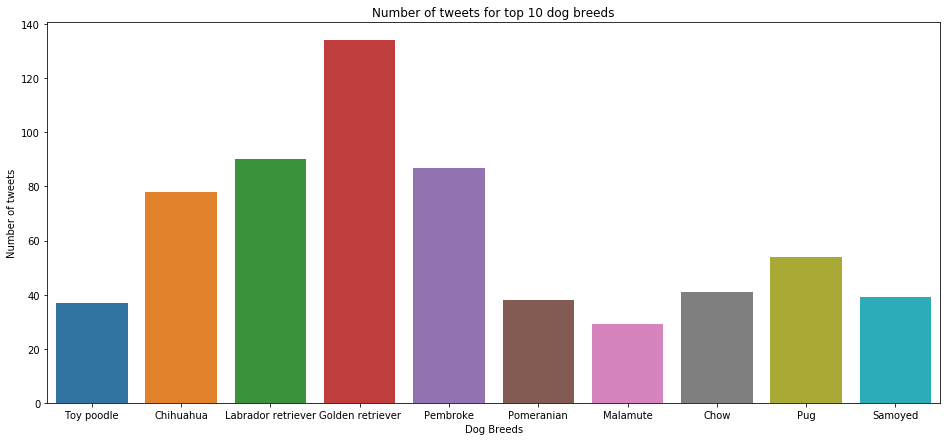

In [78]:
plt.figure(figsize=[16, 7])
countplot(df[(df.predicted_breed != 'Unknown')].groupby('predicted_breed').filter(lambda x: len(x) >= 28), 'predicted_breed', 'Dog Breeds', 'Number of tweets', 'Number of tweets for top 10 dog breeds')

The **Golden Retriever** breeds recieved the highest amount of tweets by **WeRateDogs** tweeter account for the period under analysis.

### Insight Two: What dog breed has the highest retweet count?

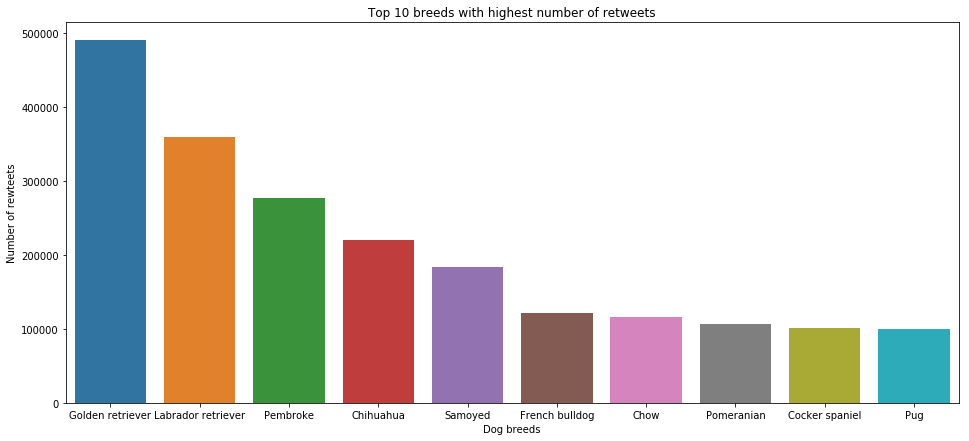

In [79]:
df_retweet = df[(df.predicted_breed != 'Unknown')].groupby('predicted_breed', as_index=False).sum().sort_values('retweet_count', ascending=False).head(10)
plt.figure(figsize=[16, 7])
barplot(df_retweet.predicted_breed, df_retweet.retweet_count, "Dog breeds", "Number of rewteets", "Top 10 breeds with highest number of retweets", hue=None,  palette=None, ylim=None, order=None)

The **Golden Retriever** breeds recieved the highest amount of retweets for the period under analysis.

### Insight Three: What breed of dog has the highest number of fevorite tweets?

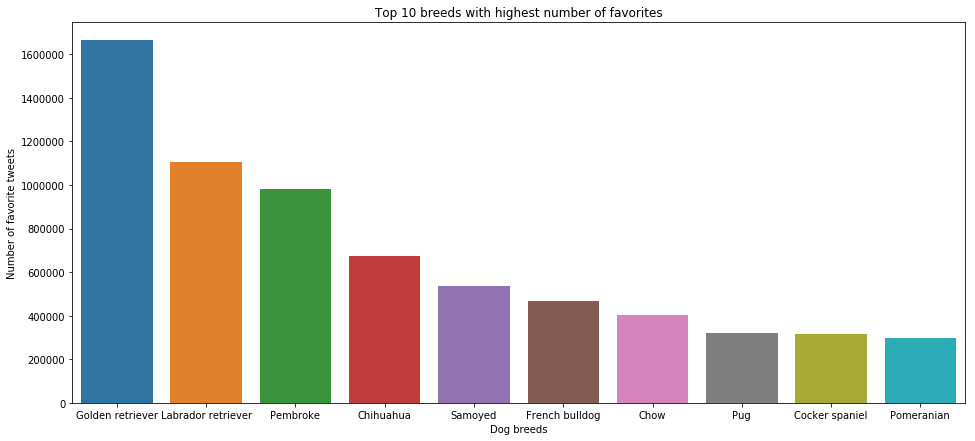

In [80]:
df_favorite = df[(df.predicted_breed != 'Unknown')].groupby('predicted_breed', as_index=False).sum().sort_values('favorite_count', ascending=False).head(10)
plt.figure(figsize=[16, 7])
barplot(df_favorite.predicted_breed, df_favorite.favorite_count, "Dog breeds", "Number of favorite tweets", "Top 10 breeds with highest number of favorites", hue=None,  palette=None, ylim=None, order=None)

The **Golden Retriever** breeds recieved the highest amount of favorites for the period under study.

### Insight Four: Do retweet count corrolate with favorite count?

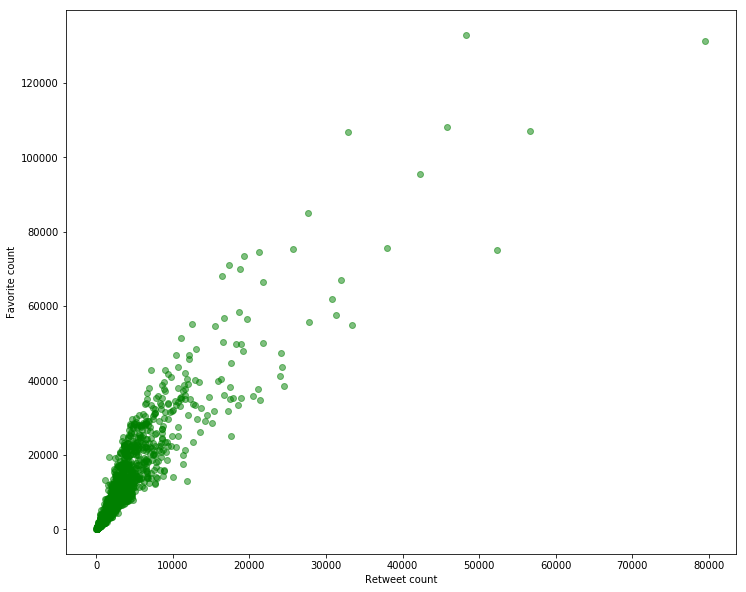

In [81]:
plt.figure(figsize=[12, 10])
plt.scatter(df.retweet_count, df.favorite_count, c="g", alpha=0.5)
plt.xlabel("Retweet count")
plt.ylabel("Favorite count")
plt.show()

There is strong positive correlation between **retweet count** and **favorite count** for almost all values.

### Insight Five: What dog have the higest rating?

In [82]:
df.rating_numerator.describe()

count    1976.000000
mean       11.811225
std        39.742068
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

The mean rating for the dogs is **11.81/10**, minimum rating is **2/10**, the 75 percentile is **12.0** and maximum rating is **1776/10**

In [83]:
df[df.rating_numerator == 1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,rating_numerator,name,term,favorite_count,retweet_count,jpg_url,predicted_breed,conf_level
1401,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,10,1776.0,Atticus,None,5569,2772,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,Unknown,0.0


In [84]:
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')

This is **Atticus**, the cute dog that is simply American Af. She holds WeRateDogs highest rating for the period under study, with a rating of **1776/10**. What a champ!!!.

In [85]:
df[df.rating_numerator == 2]

,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,rating_numerator,name,term,favorite_count,retweet_count,jpg_url,predicted_breed,conf_level
849,678424312106393600,2015-12-20 03:58:55,Twitter for iPhone,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,https://twitter.com/dog_rates/status/678424312106393600/photo/1,10,2.0,Crystal,None,5916,2880,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,Maltese dog,0.759945


In [86]:
Image(url = 'https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg')

This is **Crystal**, the pole dancing maltese dog which holds the WeRateDog's least rating of **2/10** for the period under study.

### Insight Six: What's WeRateDog's tweet rate over the period under study?

In [87]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_tweets_monthly = df.groupby(pd.Grouper(key ="timestamp", freq = "M")).count().reset_index()

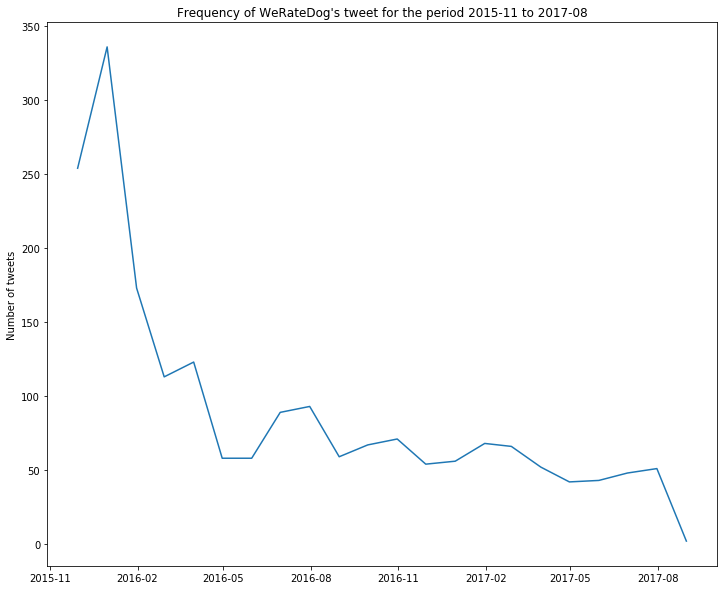

In [88]:
plt.figure(figsize=[12, 10])
plt.plot(df_tweets_monthly.timestamp, df_tweets_monthly.tweet_id)
plt.ylabel("Number of tweets")
plt.title("Frequency of WeRateDog's tweet for the period 2015-11 to 2017-08")
plt.show()

There is a sharp increase of tweets during the holday period of 2015 (2015-11 to 2015-12). From January 2016 there was a steady decline in the number of tweets till the summer of 2016 where there is noticable spike in number of tweets. Followed by a steady decline during the periods 2016-08 - 2016-9. The rates of tweets largely remained constant with noticable increase during the holidays and summer period throught the remainder of months till 2017-08 when there was a steep decline. 

### Insight Seven: What is the most popular dog name on WeRateDog's tweets?

In [89]:
df[(df.name != 'None')].name.value_counts()[:10]

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
Penny       9
Winston     8
Lola        8
Sadie       8
Daisy       7
Name: name, dtype: int64

Charlie and Lucy are the most popular dog names. Lucy and Oliver are tie for the second most popular dog names.

### Insight Eight: What are the sources of WeRateDogs tweets?

In [90]:
df.source.value_counts()

Twitter for iPhone    1848
Vine                    90
Twitter Web Client      27
TweetDeck               11
Name: source, dtype: int64

In [91]:
df.source.value_counts(normalize=True)

Twitter for iPhone    0.935223
Vine                  0.045547
Twitter Web Client    0.013664
TweetDeck             0.005567
Name: source, dtype: float64

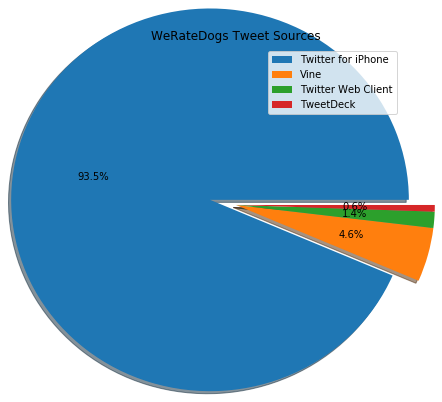

In [92]:
plt.figure(figsize=[5, 5])
labels = ["Twitter for iPhone", "Vine", "Twitter Web Client", "TweetDeck"]
explode = (0.2, 0, 0, 0)
plt.pie(df.source.value_counts(normalize=True), explode=explode, radius=1.5, autopct="%1.1f%%", shadow=True)
plt.title("WeRateDogs Tweet Sources")
plt.legend(labels, loc=0)
plt.tight_layout()
plt.show()

WeRateDogs was tweeting 93.5% of the time from an apple iphone.

### Insights Summary
1. The **Golden Retriever** breeds recieved the highest amount of tweets by **WeRateDogs** tweeter account for the period under analysis.


2. The **Golden Retriever** breeds recieved the highest amount of retweets for the period under analysis.


3. The **Golden Retriever** breeds recieved the highest amount of favorites for the period under study.


4. There is strong positive correlation between **retweet count** and **favorite count** for almost all values.


5. This dog **Atticus**, holds WeRateDog's highest rating for the period under study, with a rating of **1776/10**. While the dog  **Crystal**, holds WeRateDog's least rating of **2/10** for the period under study.


6. There is a sharp increase of tweets during the holday period of 2015 (2015-11 to 2015-12). From January 2016 there was a steady decline in the number of tweets till the summer of 2016 where there is noticable spike in number of tweets. Followed by a steady decline during the periods 2016-08 - 2016-9. The rates of tweets largely remained constant with noticable increase during the holidays and summer period throught the remainder of months till 2017-08 when there was a steep decline. From this data it can deduced that the operator of WeRateDogs twitter page is most likely a student during this period. As increase in the amount of tweets coicide with period when students are on break.


7. Charlie and Lucy are WeRateDogs most popular dog names. Lucy and Oliver tied for the second most popular dog names.


8. WeRateDogs was tweeting 93.5% of the time from an apple iphone.

